#### Import Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sqlite3
import seaborn as sns
import numpy as np
from collections import Counter

#### Load the data 

In [42]:
rating_df = pd.read_csv("C:/Users/mulwa/Desktop/Phase-2-Movie-project--Group-9/DataSets/rt.movie_info.tsv",sep ='\t')

#### Objective which movies has the highest rating 

#### Data Cleaning

In [43]:
rating_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [44]:
#Checking for duplicates;There are no duplicates in my dataset
duplicated =rating_df.duplicated().sum()
duplicated

0

In [45]:
#Check for missing values
missing =rating_df.isnull().sum()
missing 

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [46]:
#Fill the NA values in synopsis with No synopsis available
rating_df['synopsis'].fillna("No synopsis available", inplace=True)

C:\Users\mulwa\AppData\Local\Temp\ipykernel_12136\260909044.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_df['synopsis'].fillna("No synopsis available", inplace=True)


In [47]:
#   In rating null =mode
mode_rating = rating_df['rating'].mode()[0]
rating_df['rating'].fillna(mode_rating, inplace=True)

C:\Users\mulwa\AppData\Local\Temp\ipykernel_12136\2278557045.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_df['rating'].fillna(mode_rating, inplace=True)


In [48]:
#Replace missing genre with unknown 
rating_df['genre'].fillna("Unknown", inplace=True)

C:\Users\mulwa\AppData\Local\Temp\ipykernel_12136\2380161437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_df['genre'].fillna("Unknown", inplace=True)


In [49]:
#Replace writing with unknown
rating_df['writer'].fillna("Unknown", inplace=True)

C:\Users\mulwa\AppData\Local\Temp\ipykernel_12136\1553116804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_df['writer'].fillna("Unknown", inplace=True)


In [50]:
#Replace Studio with unknown
rating_df['studio'].fillna("Independent", inplace=True)

C:\Users\mulwa\AppData\Local\Temp\ipykernel_12136\3773312981.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_df['studio'].fillna("Independent", inplace=True)


In [51]:
#Drop rows with missing theatre date 
rating_df.dropna(subset=['theater_date'], inplace=True)

In [52]:
#Fill na directors as Unknown
rating_df['director'].fillna("Unknown", inplace=True)

C:\Users\mulwa\AppData\Local\Temp\ipykernel_12136\1959475576.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_df['director'].fillna("Unknown", inplace=True)


In [53]:
#Dropping bot currency and box office columns 
rating_df.drop(columns=['currency', 'box_office'], inplace=True)

In [54]:
#Droppinng the nulls in runtime colmnn
rating_df.dropna(subset=['runtime'], inplace=True)

In [55]:
#Checking if we have any null values 
rating_df.isnull().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
studio          0
dtype: int64

#### Data types

In [56]:
rating_df.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
runtime         object
studio          object
dtype: object

In [57]:
#Converting Data type
#ID to Integer 
rating_df['id'] = rating_df['id'].astype(int)
#Date to datetime
rating_df['theater_date'] = pd.to_datetime(rating_df['theater_date'], errors='coerce')
rating_df['dvd_date'] = pd.to_datetime(rating_df['dvd_date'], errors='coerce')
#Remove text in runtime and converting the data to int 
rating_df['runtime'] = rating_df['runtime'].str.replace(' minutes', '').astype(int)



In [58]:
rating_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104,Independent
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,116,Independent
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,128,Independent
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,95,Warner Bros. Pictures


### Data Visualization 

#### 10 most popular Movies

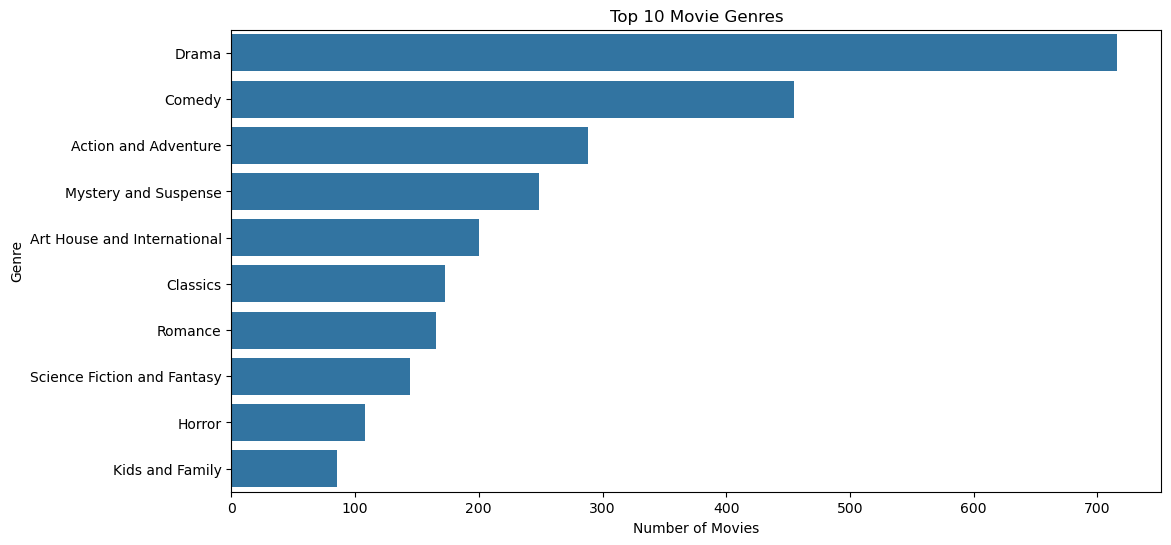

In [59]:
#An Histogram presentation of Genre and the nmber of movie counts
rating_df['genre'] = rating_df['genre'].fillna('').apply(lambda x: x.split('|'))
genre_counts = rating_df.explode('genre')['genre'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

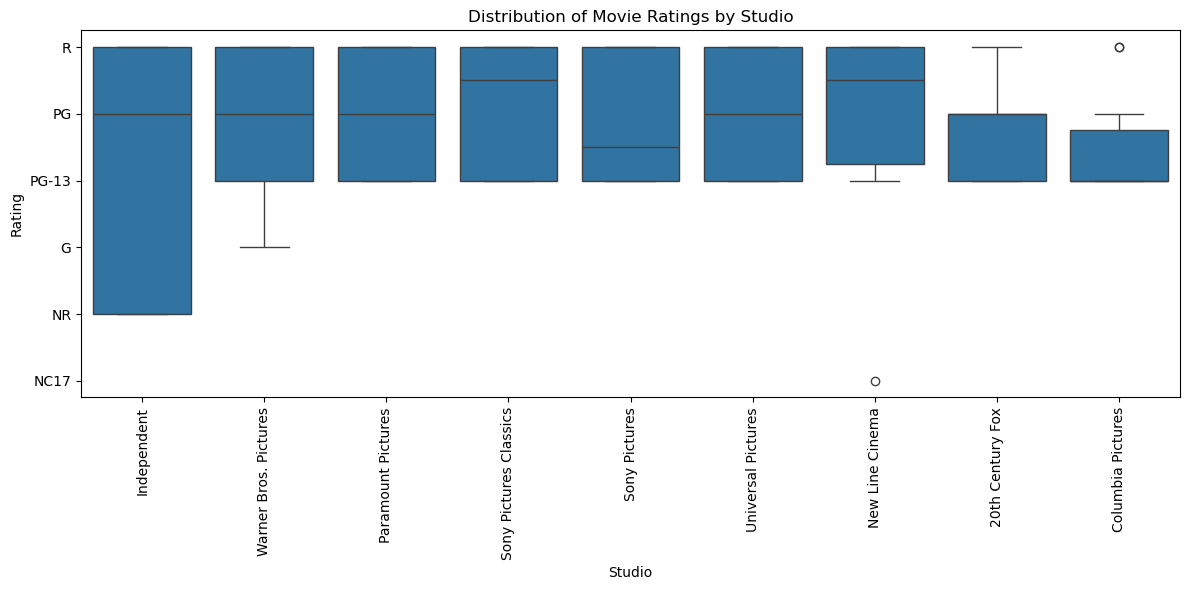

In [62]:
#A boxplot presentation of studio and ratings 
#It shows the independent studios produce higghly variable rated movies
studio_counts = rating_df['studio'].value_counts()
top_studios = studio_counts[studio_counts >= 10].index  # For example, studios with at least 10 movies
filtered_data = rating_df[rating_df['studio'].isin(top_studios)]
# Set plot size
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(data=filtered_data, x='studio', y='rating')
plt.xticks(rotation=90)
plt.title('Distribution of Movie Ratings by Studio')
plt.xlabel('Studio')
plt.ylabel('Rating')

# Show plot
plt.tight_layout()
plt.show()



A chi test to check if there is any relationship between our genre and ratings table

In [63]:
from scipy.stats import chi2_contingency
genre_rating_table = pd.crosstab(rating_df['genre'], rating_df['rating'])
chi2, p, dof, expected = chi2_contingency(genre_rating_table)
print(f"Chi-Square Test p-value: {p}")

TypeError: Cannot broadcast np.ndarray with operand of type <class 'list'>

In [68]:
rating_df['rating'].unique()

array(['R', 'PG', 'PG-13', 'NR', 'G', 'NC17'], dtype=object)

Conclusion 

We cannot do a Chi test to our Rating column since it is a categorical column and not a numeical column
